In [1]:
from preparing_script import agrofiz_plot, SVD_vis, suhoe_stats_barplot, radar_factory, radar_chart, mokroe_stats, mokroe_stats_barplot, mokroe_all
import pandas as pd 
import numpy as np 
import scipy 
from scipy.stats import f_oneway as ANOVA
from itertools import cycle

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo

%load_ext autoreload
%autoreload 2

## Мокрое просеивание

In [2]:
mokroe = pd.read_csv('data/мокрое просеивание все объекты.csv', index_col= 0)
suhoe_size_cats = ['>10','10-7',  '7-5','5-3']
mokroe['Размер сухого агрегата'] = pd.CategoricalIndex(mokroe['Размер сухого агрегата'], ordered=True, categories = suhoe_size_cats)
mokroe_size_cats = ['>10', '10-7', '>7', '7-5', '>5', '5-4', '5-3','4-3', '>3', '3-2', '2-1', '1-0.25',  '<0.25']
mokroe['Размеры фракций, мм'] = pd.CategoricalIndex(mokroe['Размеры фракций'], ordered=True, categories = mokroe_size_cats)
#mokroe['Размеры фракций, мм'] = mokroe['Размеры фракций']

## Урожайное 2022 год точки XX/XVIII

Тип обработки Размер сухого агрегата Размеры фракций, мм  \
                                                               
0              ПП                    >10                 >10   
1              ПП                    >10                10-7   
3              ПП                    >10                 7-5   
6              ПП                    >10                 5-3   
9              ПП                    >10                 3-2   
10             ПП                    >10                 2-1   
11             ПП                    >10              1-0.25   
12             ПП                    >10               <0.25   
15             ПП                   10-7                  >7   
16             ПП                   10-7                 7-5   
18             ПП                   10-7                 5-4   
20             ПП                   10-7                 4-3   
22             ПП                   10-7                 3-2   
23             ПП                   10-7                 2-1   
24             ПП                   10-7              1-0.25   
25             ПП                   10-7               <0.25   
30             ПП                    7-5                  >5   
31             ПП                    7-5                 5-4   
33             ПП                    7-5                 4-3   
35             ПП                    7-5                 3-2   
36             ПП                    7-5                 2-1   
37             ПП                    7-5              1-0.25   
38             ПП                    7-5               <0.25   
47             ПП                    5-3                  >3   
48             ПП                    5-3                 3-2   
49             ПП                    5-3                 2-1   
50             ПП                    5-3              1-0.25   
51             ПП                    5-3               <0.25   
52             ТТ                    >10                 >10   
53             ТТ                    >10                10-7   
55             ТТ                    >10                 7-5   
58             ТТ                    >10                 5-3   
61             ТТ                    >10                 3-2   
62             ТТ                    >10                 2-1   
63             ТТ                    >10              1-0.25   
64             ТТ                    >10               <0.25   
67             ТТ                   10-7                  >7   
68             ТТ                   10-7                 7-5   
70             ТТ                   10-7                 5-4   
72             ТТ                   10-7                 4-3   
74             ТТ                   10-7                 3-2   
75             ТТ                   10-7                 2-1   
76             ТТ                   10-7              1-0.25   
77             ТТ                   10-7               <0.25   
82             ТТ                    7-5                  >5   
83             ТТ                    7-5                 5-4   
85             ТТ                    7-5                 4-3   
87             ТТ                    7-5                 3-2   
88             ТТ                    7-5                 2-1   
89             ТТ                    7-5              1-0.25   
90             ТТ                    7-5               <0.25   
99             ТТ                    5-3                  >3   
100            ТТ                    5-3                 3-2   
101            ТТ                    5-3                 2-1   
102            ТТ                    5-3              1-0.25   
103            ТТ                    5-3               <0.25   

    Содержание агрегатов, %                        
                       mean        std        sem  
0                 20.178333   9.167428   5.292817  
1                 10.675000   2.706469   1.562581  
3                 14.400000   3.071429   1.773290  
6                 20.190000   2

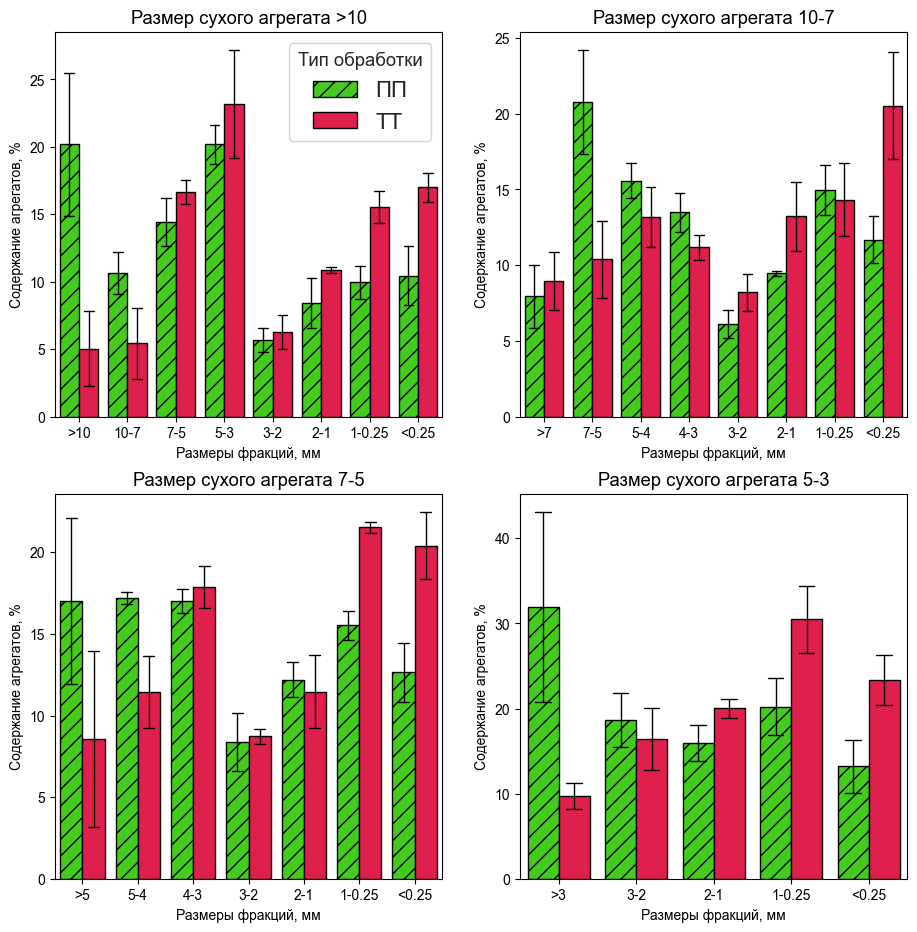

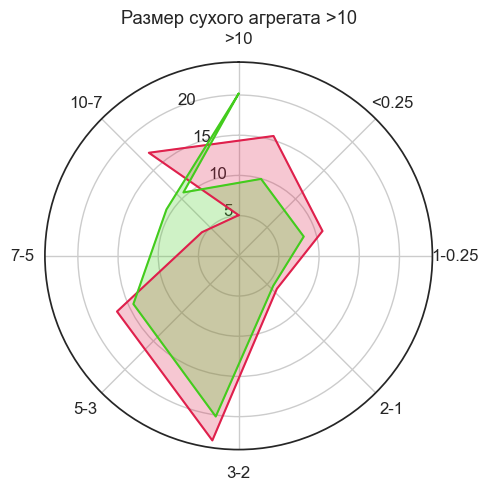

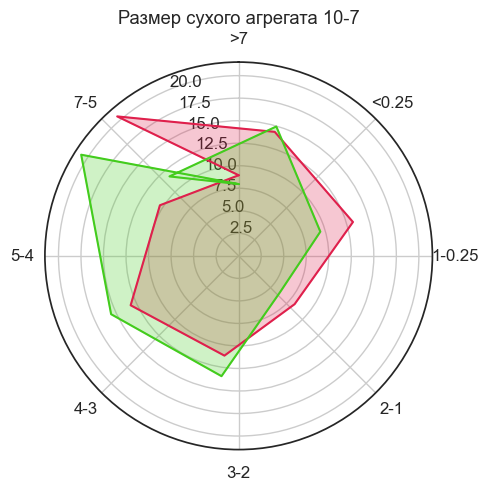

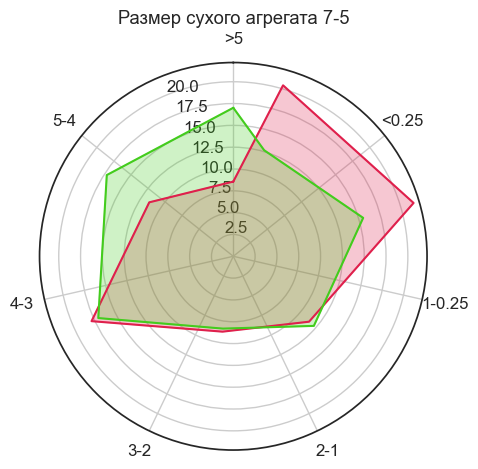

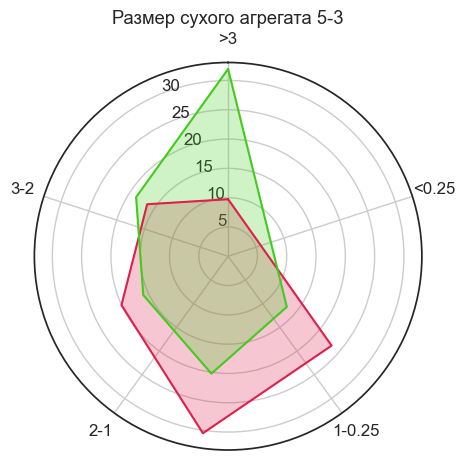

In [3]:
mokroe_uroshaynoe_2022 = mokroe[
    (mokroe["region"] == 'урожайное') & 
    (mokroe["Год"] == 2022) &
    mokroe['GPS №'].isin(['XX', 'XVIII'])
    ]

stats = (mokroe_all(mokroe_uroshaynoe_2022))
stats

## Урожайное 2017 год точки XX/XVIII (тут одна повторность!)

Empty DataFrame
Columns: [(Тип обработки, ), (Размер сухого агрегата, ), (Размеры фракций, мм, ), (Содержание агрегатов, %, mean), (Содержание агрегатов, %, std), (Содержание агрегатов, %, sem)]
Index: []

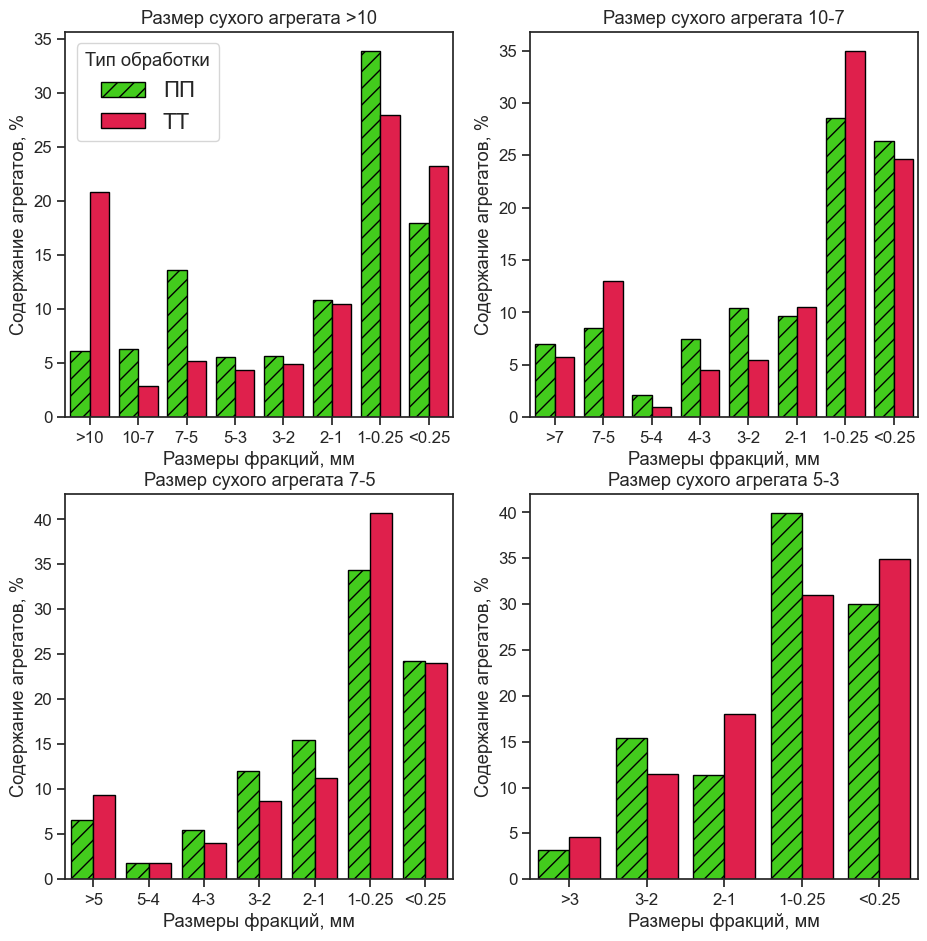

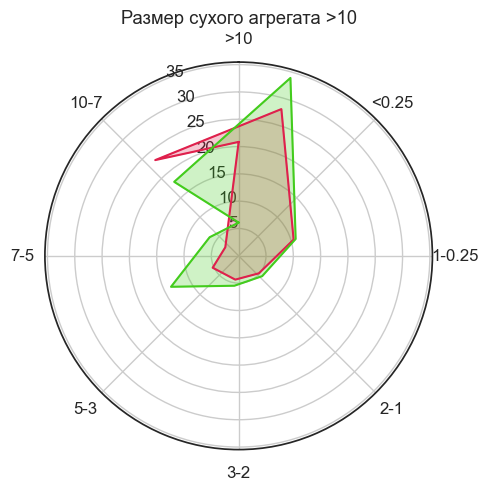

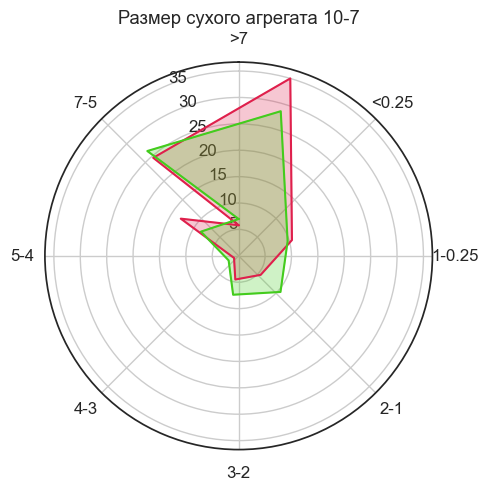

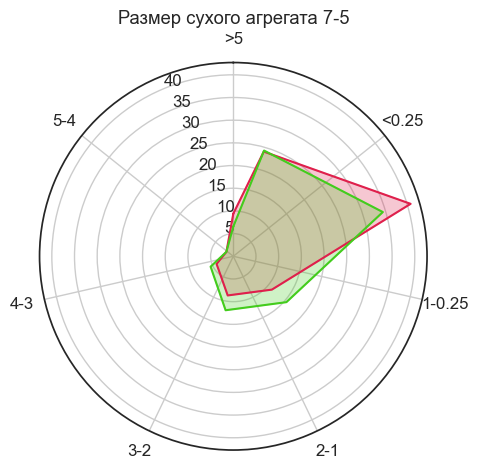

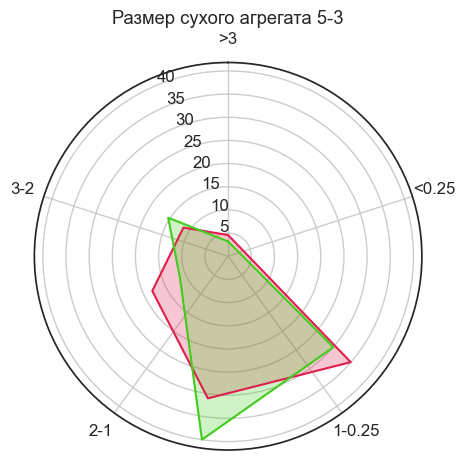

In [4]:
mokroe_uroshaynoe_2017 = mokroe[
    (mokroe["region"] == 'урожайное') & 
    (mokroe["Год"] == 2017) &
    mokroe['GPS №'].isin(['XX', 'XVIII'])
    ]

stats = (mokroe_all(mokroe_uroshaynoe_2017))
stats

## Курск 2019

Тип обработки Размер сухого агрегата Размеры фракций, мм  \
                                                               
0              ПП                    >10                 >10   
1              ПП                    >10                10-7   
3              ПП                    >10                 7-5   
6              ПП                    >10                 5-3   
9              ПП                    >10                 3-2   
10             ПП                    >10                 2-1   
11             ПП                    >10              1-0.25   
12             ПП                    >10               <0.25   
15             ПП                   10-7                  >7   
16             ПП                   10-7                 7-5   
18             ПП                   10-7                 5-4   
20             ПП                   10-7                 4-3   
22             ПП                   10-7                 3-2   
23             ПП                   10-7                 2-1   
24             ПП                   10-7              1-0.25   
25             ПП                   10-7               <0.25   
30             ПП                    7-5                  >5   
31             ПП                    7-5                 5-4   
33             ПП                    7-5                 4-3   
35             ПП                    7-5                 3-2   
36             ПП                    7-5                 2-1   
37             ПП                    7-5              1-0.25   
38             ПП                    7-5               <0.25   
47             ПП                    5-3                  >3   
48             ПП                    5-3                 3-2   
49             ПП                    5-3                 2-1   
50             ПП                    5-3              1-0.25   
51             ПП                    5-3               <0.25   
52             ТТ                    >10                 >10   
53             ТТ                    >10                10-7   
55             ТТ                    >10                 7-5   
58             ТТ                    >10                 5-3   
61             ТТ                    >10                 3-2   
62             ТТ                    >10                 2-1   
63             ТТ                    >10              1-0.25   
64             ТТ                    >10               <0.25   
67             ТТ                   10-7                  >7   
68             ТТ                   10-7                 7-5   
70             ТТ                   10-7                 5-4   
72             ТТ                   10-7                 4-3   
74             ТТ                   10-7                 3-2   
75             ТТ                   10-7                 2-1   
76             ТТ                   10-7              1-0.25   
77             ТТ                   10-7               <0.25   
82             ТТ                    7-5                  >5   
83             ТТ                    7-5                 5-4   
85             ТТ                    7-5                 4-3   
87             ТТ                    7-5                 3-2   
88             ТТ                    7-5                 2-1   
89             ТТ                    7-5              1-0.25   
90             ТТ                    7-5               <0.25   
99             ТТ                    5-3                  >3   
100            ТТ                    5-3                 3-2   
101            ТТ                    5-3                 2-1   
102            ТТ                    5-3              1-0.25   
103            ТТ                    5-3               <0.25   

    Содержание агрегатов, %                       
                       mean        std       sem  
0                     16.75  17.517491  7.834060  
1                      3.09   4.989163  2.231222  
3                      1.69   1.244186  0.556417  
6                      5.38   2.4450

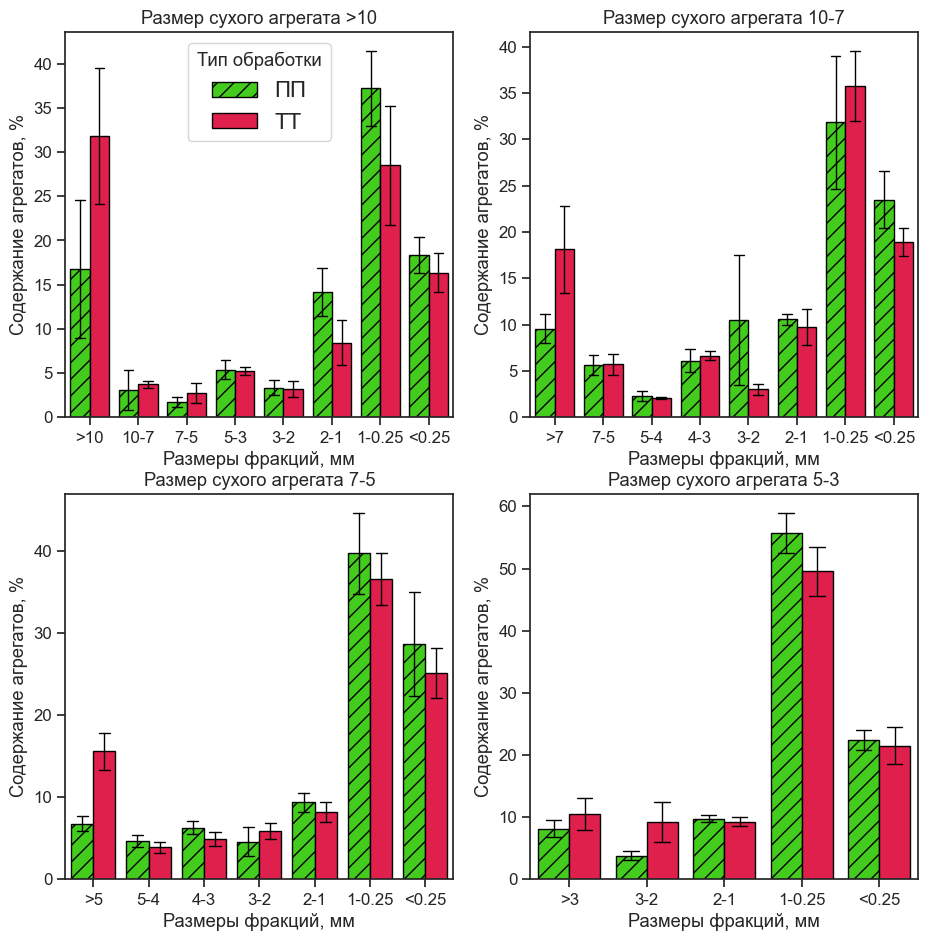

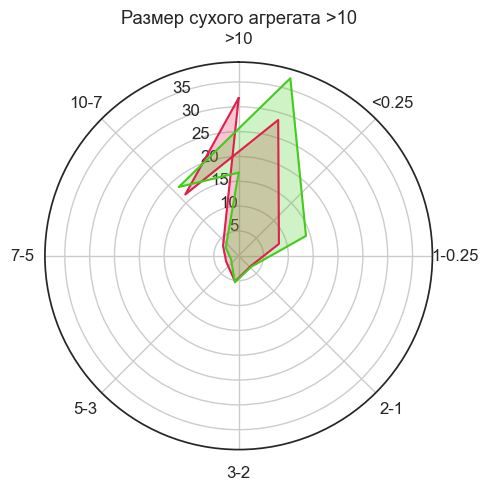

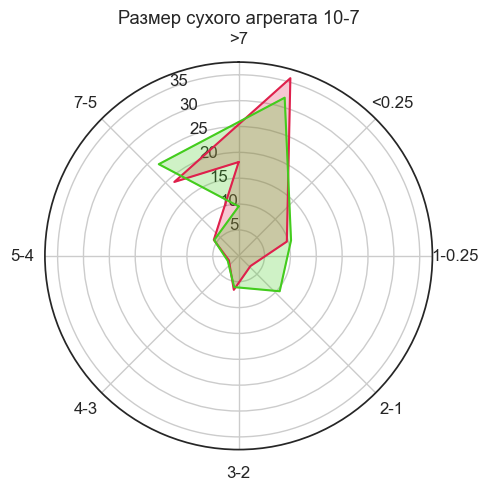

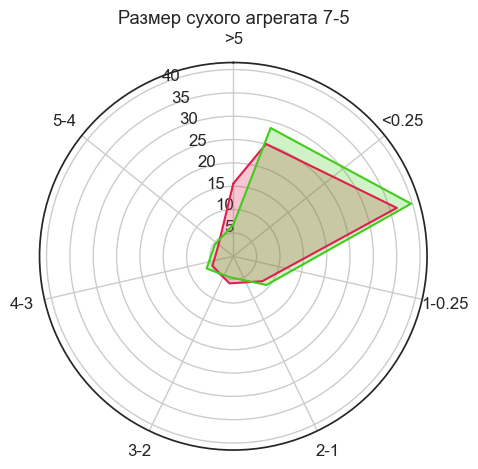

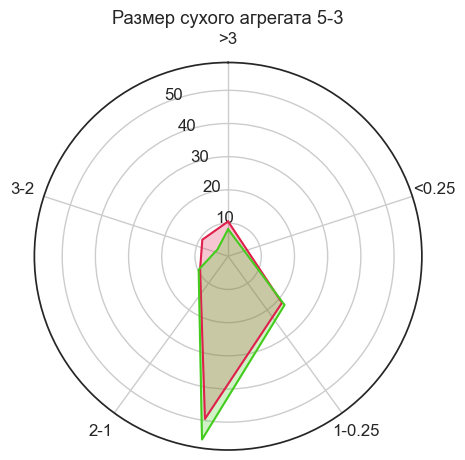

In [5]:
mokroe_kursk = mokroe[
    (mokroe["region"] == 'Курск') ] 
    

stats = (mokroe_all(mokroe_kursk))
stats

## Архангельский 2019


Тип обработки Размер сухого агрегата Размеры фракций, мм  \
                                                               
0              ПП                    >10                 >10   
1              ПП                    >10                10-7   
3              ПП                    >10                 7-5   
6              ПП                    >10                 5-3   
9              ПП                    >10                 3-2   
10             ПП                    >10                 2-1   
11             ПП                    >10              1-0.25   
12             ПП                    >10               <0.25   
15             ПП                   10-7                  >7   
16             ПП                   10-7                 7-5   
18             ПП                   10-7                 5-4   
20             ПП                   10-7                 4-3   
22             ПП                   10-7                 3-2   
23             ПП                   10-7                 2-1   
24             ПП                   10-7              1-0.25   
25             ПП                   10-7               <0.25   
30             ПП                    7-5                  >5   
31             ПП                    7-5                 5-4   
33             ПП                    7-5                 4-3   
35             ПП                    7-5                 3-2   
36             ПП                    7-5                 2-1   
37             ПП                    7-5              1-0.25   
38             ПП                    7-5               <0.25   
47             ПП                    5-3                  >3   
48             ПП                    5-3                 3-2   
49             ПП                    5-3                 2-1   
50             ПП                    5-3              1-0.25   
51             ПП                    5-3               <0.25   
52             ТТ                    >10                 >10   
53             ТТ                    >10                10-7   
55             ТТ                    >10                 7-5   
58             ТТ                    >10                 5-3   
61             ТТ                    >10                 3-2   
62             ТТ                    >10                 2-1   
63             ТТ                    >10              1-0.25   
64             ТТ                    >10               <0.25   
67             ТТ                   10-7                  >7   
68             ТТ                   10-7                 7-5   
70             ТТ                   10-7                 5-4   
72             ТТ                   10-7                 4-3   
74             ТТ                   10-7                 3-2   
75             ТТ                   10-7                 2-1   
76             ТТ                   10-7              1-0.25   
77             ТТ                   10-7               <0.25   
82             ТТ                    7-5                  >5   
83             ТТ                    7-5                 5-4   
85             ТТ                    7-5                 4-3   
87             ТТ                    7-5                 3-2   
88             ТТ                    7-5                 2-1   
89             ТТ                    7-5              1-0.25   
90             ТТ                    7-5               <0.25   
99             ТТ                    5-3                  >3   
100            ТТ                    5-3                 3-2   
101            ТТ                    5-3                 2-1   
102            ТТ                    5-3              1-0.25   
103            ТТ                    5-3               <0.25   

    Содержание агрегатов, %                       
                       mean        std       sem  
0                 23.840000  13.638887  6.099496  
1                  3.960000   2.895989  1.295125  
3                  7.570000   3.832036  1.713739  
6                 14.840000   4.3651

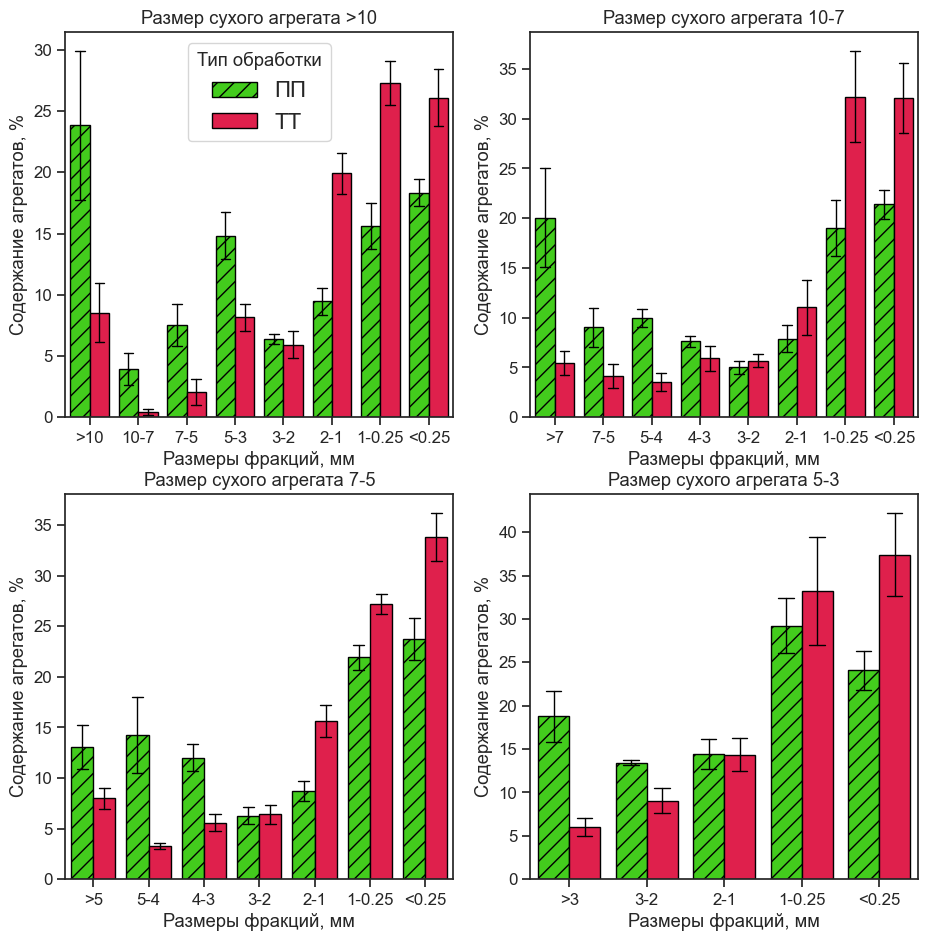

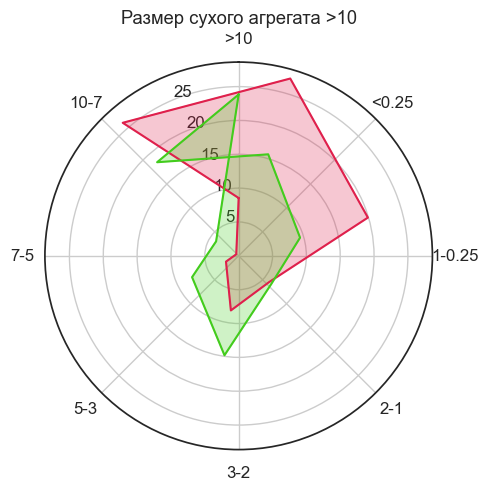

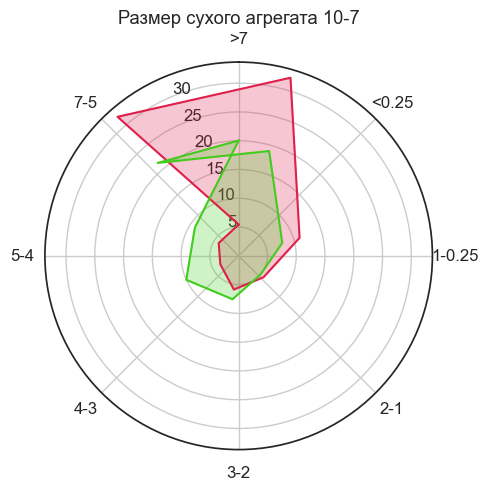

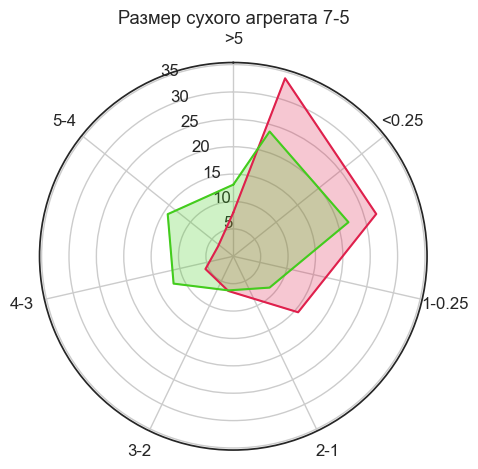

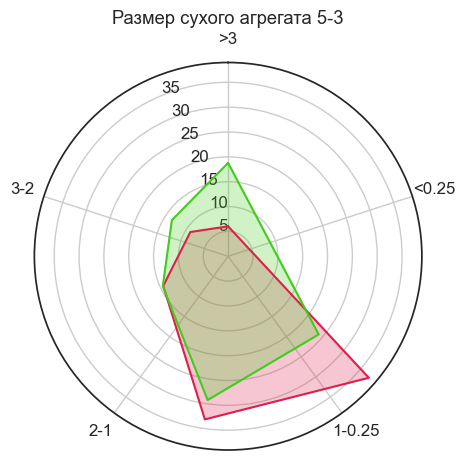

In [6]:
mokroe_archan = mokroe[
    (mokroe["region"] == 'архангельский') ] 
    

stats = (mokroe_all(mokroe_archan))
stats